In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import matplotlib.font_manager as fm
path = 'C:\Windows\Fonts\gulim.ttc'
font_name = fm.FontProperties(fname = path).get_name()
print(font_name)
plt.rc('font', family=font_name)

import folium

Gulim


## 경고 메세지 없애기

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
park = pd.read_csv('data/전국도시공원표준데이터.csv', encoding='euc-kr')
park.shape


(17967, 20)

In [7]:
park.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26290-00001,대연공원,근린공원,NaN,부산광역시 남구 대연동 산100-1일원,35.140147,129.094511,55227.0,NaN,NaN,NaN,NaN,NaN,1944-01-03,NaN,NaN,2018-08-14,3310000,부산광역시 남구,NaN


In [8]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17967 entries, 0 to 17966
Data columns (total 20 columns):
관리번호            17967 non-null object
공원명             17967 non-null object
공원구분            17967 non-null object
소재지도로명주소        9189 non-null object
소재지지번주소         17063 non-null object
위도              17967 non-null float64
경도              17967 non-null float64
공원면적            17967 non-null float64
공원보유시설(운동시설)    4747 non-null object
공원보유시설(유희시설)    6826 non-null object
공원보유시설(편익시설)    4947 non-null object
공원보유시설(교양시설)    1147 non-null object
공원보유시설(기타시설)    3173 non-null object
지정고시일           15177 non-null object
관리기관명           17427 non-null object
전화번호            16999 non-null object
데이터기준일자         17967 non-null object
제공기관코드          17967 non-null object
제공기관명           17967 non-null object
Unnamed: 19     0 non-null float64
dtypes: float64(4), object(16)
memory usage: 2.7+ MB


## 결측치 확인

In [10]:
park.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소         8778
소재지지번주소           904
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13220
공원보유시설(유희시설)    11141
공원보유시설(편익시설)    13020
공원보유시설(교양시설)    16820
공원보유시설(기타시설)    14794
지정고시일            2790
관리기관명             540
전화번호              968
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     17967
dtype: int64

In [11]:
park.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [12]:
park.drop(columns = ['공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명'], inplace = True)

In [14]:
park.shape

(17967, 13)

## 데이터 전처리

In [15]:
park.dtypes

관리번호            object
공원명             object
공원구분            object
소재지도로명주소        object
소재지지번주소         object
위도             float64
경도             float64
공원면적           float64
전화번호            object
데이터기준일자         object
제공기관코드          object
제공기관명           object
Unnamed: 19    float64
dtype: object

In [16]:
park.drop(columns = ['Unnamed: 19'], inplace = True)

In [17]:
park.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
dtype: object

In [18]:
park['소재지도로명주소'].isnull().sum()

8778

In [19]:
park['소재지지번주소'].isnull().sum()

904

In [20]:
park.loc[(park['소재지도로명주소'].isnull()) & (park['소재지지번주소'].notnull())].shape

(8778, 12)

In [21]:
park['소재지도로명주소'].fillna(park['소재지지번주소'], inplace = True)

In [22]:
park['소재지도로명주소'].isnull().sum()

0

In [23]:
park['소재지지번주소'].fillna(park['소재지도로명주소'], inplace = True)

In [24]:
park['소재지지번주소'].isnull().sum()

0

# '시도' 컬럼 추가

In [25]:
park.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명
0,26290-00001,대연공원,근린공원,부산광역시 남구 대연동 산100-1일원,부산광역시 남구 대연동 산100-1일원,35.140147,129.094511,55227.0,NaN,2018-08-14,3310000,부산광역시 남구
1,26290-00003,당곡공원,역사공원,부산광역시 남구 대연동 산205-2,부산광역시 남구 대연동 산205-2,35.125023,129.091385,75465.0,NaN,2018-08-14,3310000,부산광역시 남구
2,26290-00004,대일어린이공원,어린이공원,부산광역시 남구 유엔평화로13번길 63(대연동),부산광역시 남구 대연동 1727-1,35.134079,129.095471,422.1,NaN,2018-08-14,3310000,부산광역시 남구
3,26290-00005,못골어린이공원,어린이공원,부산광역시 남구 진남로 46번길 37,부산광역시 남구 대연동 1475-2,35.139799,129.090081,499.8,NaN,2018-08-14,3310000,부산광역시 남구
4,26290-00006,솔밭어린이공원,어린이공원,부산광역시 남구 동명로 114,부산광역시 남구 용호동 409-5,35.120074,129.109518,1500.2,NaN,2018-08-14,3310000,부산광역시 남구


In [27]:
park['시도'] = park['소재지도로명주소'].str.split(' ', expand = True)[0]
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도
0,26290-00001,대연공원,근린공원,부산광역시 남구 대연동 산100-1일원,부산광역시 남구 대연동 산100-1일원,35.140147,129.094511,55227.0,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시
1,26290-00003,당곡공원,역사공원,부산광역시 남구 대연동 산205-2,부산광역시 남구 대연동 산205-2,35.125023,129.091385,75465.0,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시
2,26290-00004,대일어린이공원,어린이공원,부산광역시 남구 유엔평화로13번길 63(대연동),부산광역시 남구 대연동 1727-1,35.134079,129.095471,422.1,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시


In [28]:
park['구군'] = park['소재지도로명주소'].str.split(' ', expand = True)[1]
park.head(3)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
0,26290-00001,대연공원,근린공원,부산광역시 남구 대연동 산100-1일원,부산광역시 남구 대연동 산100-1일원,35.140147,129.094511,55227.0,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시,남구
1,26290-00003,당곡공원,역사공원,부산광역시 남구 대연동 산205-2,부산광역시 남구 대연동 산205-2,35.125023,129.091385,75465.0,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시,남구
2,26290-00004,대일어린이공원,어린이공원,부산광역시 남구 유엔평화로13번길 63(대연동),부산광역시 남구 대연동 1727-1,35.134079,129.095471,422.1,NaN,2018-08-14,3310000,부산광역시 남구,부산광역시,남구


# 공원 구분 데이터확인하기

In [29]:
park['공원구분'].unique()

array(['근린공원', '역사공원', '어린이공원', '묘지공원', '수변공원', '소공원', '문화공원', '체육공원',
       '기타', '도시농업공원', '도시자연공원', '도시자연공원구역', '도시농업공원구역', '주제공원'],
      dtype=object)

In [30]:
park['공원구분'].value_counts()

어린이공원       9881
근린공원        4159
소공원         2628
문화공원         304
수변공원         291
기타           248
체육공원         230
역사공원         163
묘지공원          43
도시농업공원        10
도시자연공원         6
도시자연공원구역       2
도시농업공원구역       1
주제공원           1
Name: 공원구분, dtype: int64

In [31]:
len(park.loc[park['공원구분'] == '어린이공원'])

9881

In [33]:
park['시도'].value_counts()

경기도        3304
전라남도       1954
경상남도       1825
충청남도       1723
서울특별시      1629
전라북도       1145
충청북도        924
경상북도        854
울산광역시       853
강원도         740
부산광역시       660
인천광역시       604
대구광역시       586
광주광역시       431
대전광역시       419
제주특별자치도     246
세종특별자치시      70
Name: 시도, dtype: int64

In [34]:
park_do = pd.DataFrame(park['시도'].value_counts())
park_do.head()

,시도
경기도,3304
전라남도,1954
경상남도,1825
충청남도,1723
서울특별시,1629


In [35]:
park_do['비율'] = park_do['시도']/ park_do['시도'].sum()

In [36]:
park_do.head()

,시도,비율
경기도,3304,0.183893
전라남도,1954,0.108755
경상남도,1825,0.101575
충청남도,1723,0.095898
서울특별시,1629,0.090666


In [40]:
park_do.columns = ['공원합계', '비율']
park_do

,공원합계,비율
경기도,3304,0.183893
전라남도,1954,0.108755
경상남도,1825,0.101575
충청남도,1723,0.095898
서울특별시,1629,0.090666
전라북도,1145,0.063728
충청북도,924,0.051428
경상북도,854,0.047532
울산광역시,853,0.047476
강원도,740,0.041187


In [43]:
import matplotlib
matplotlib.rc('xtick', labelsize = 15)
matplotlib.rc('ytick', labelsize = 15)

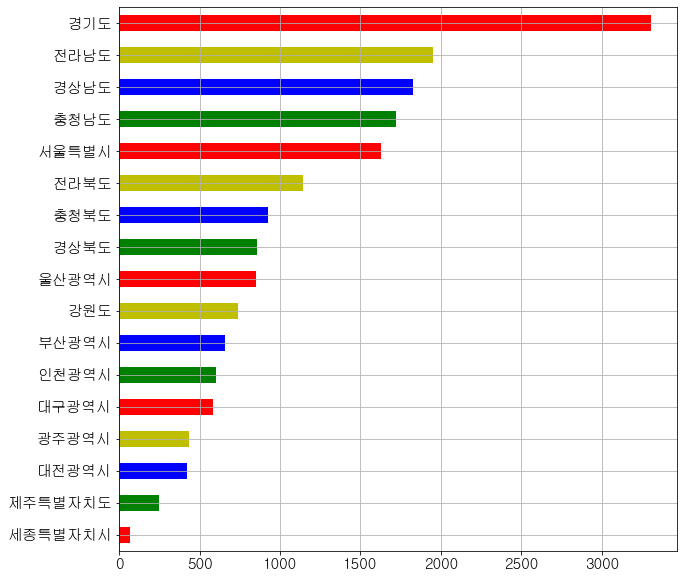

In [51]:
park_do['공원합계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10), colors=['r','g','b','y'])
plt.show()

In [52]:
park_type = pd.DataFrame(park['공원구분'].value_counts())
park_type.head()

,공원구분
어린이공원,9881
근린공원,4159
소공원,2628
문화공원,304
수변공원,291


In [53]:
park_type['비율'] = park_type['공원구분']/ park_type['공원구분'].sum()
park_type.head()

,공원구분,비율
어린이공원,9881,0.549953
근린공원,4159,0.231480
소공원,2628,0.146268
문화공원,304,0.016920
수변공원,291,0.016196


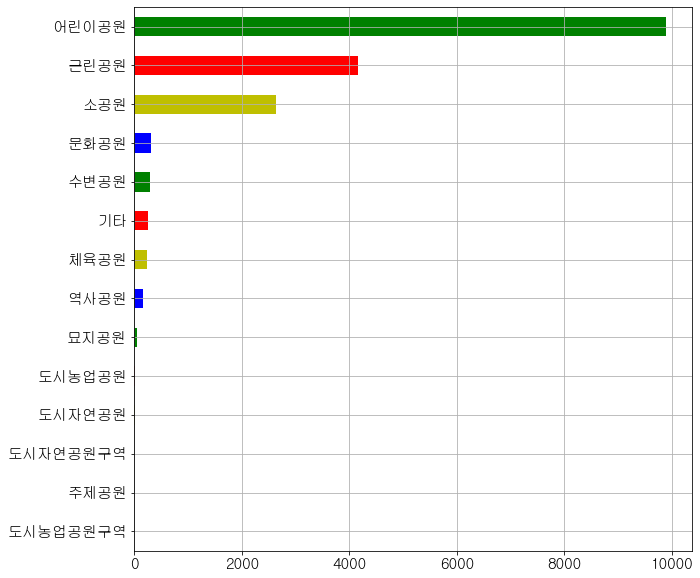

In [55]:
park_type['공원구분'].sort_values().plot(kind='barh', grid=True, figsize=(10,10), colors=['r','g','b','y'])
plt.show()

In [56]:
gg = park.loc[park['시도'] == '경기도']
gg.shape

(3304, 14)

In [57]:
gg['공원구분'].value_counts()

어린이공원     1826
근린공원       806
소공원        394
문화공원        85
체육공원        74
수변공원        59
역사공원        32
기타          17
묘지공원         8
도시자연공원       2
도시농업공원       1
Name: 공원구분, dtype: int64

In [59]:
gg_park = gg['공원구분'].value_counts().reset_index()
gg_park

,index,공원구분
0,어린이공원,1826
1,근린공원,806
2,소공원,394
3,문화공원,85
4,체육공원,74
5,수변공원,59
6,역사공원,32
7,기타,17
8,묘지공원,8
9,도시자연공원,2


In [60]:
gg_park.columns = ('공원구분','합계')
gg_park

,공원구분,합계
0,어린이공원,1826
1,근린공원,806
2,소공원,394
3,문화공원,85
4,체육공원,74
5,수변공원,59
6,역사공원,32
7,기타,17
8,묘지공원,8
9,도시자연공원,2


In [61]:
!pip show plotnine

Name: plotnine
Version: 0.5.1
Summary: A grammar of graphics for python
Home-page: https://github.com/has2k1/plotnine
Author: None
Author-email: None
License: GPL-2
Location: c:\anaconda3\lib\site-packages
Requires: descartes, patsy, matplotlib, scipy, pandas, statsmodels, mizani, numpy
Required-by: 


In [63]:
!pip show ggplot

Name: ggplot
Version: 0.11.5
Summary: ggplot for python
Home-page: https://github.com/yhat/ggplot/
Author: Greg Lamp
Author-email: greg@yhathq.com
License: BSD
Location: c:\anaconda3\lib\site-packages
Requires: brewer2mpl, pandas, numpy, matplotlib, statsmodels, six, scipy, patsy, cycler
Required-by: 


In [68]:
import plotnine
from plotnine import *

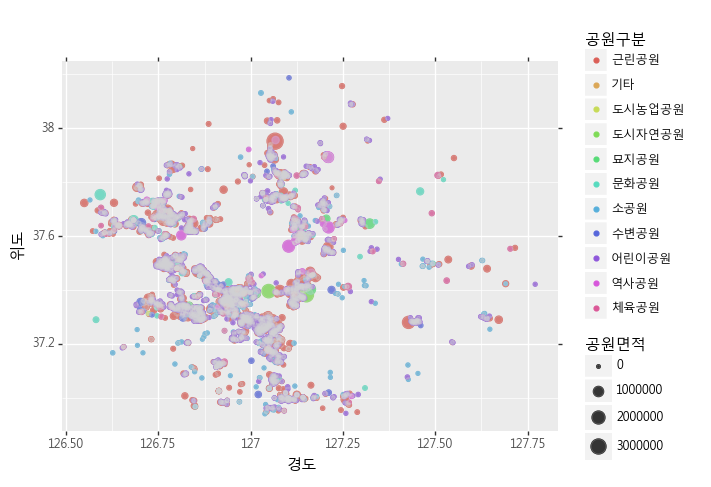

<ggplot: (17333224)>

In [71]:
(ggplot(gg)
 + aes(x = '경도', y = '위도', color = '공원구분', size = '공원면적')
 + geom_point()
 + geom_jitter(color = 'lightgray', alpha = 0.25)
 + theme(text = element_text(family = 'Malgun Gothic'))
)

In [75]:
temp = gg.loc[(gg['공원구분'] == '어린이공원') | (gg['공원구분'] == '근린공원')| (gg['공원구분'] == '소공원')]
temp

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
224,41590-00153,도와지뜰 어린이공원,어린이공원,경기도 화성시 우정읍 3.1만세로 1049,경기도 화성시 향남읍 발안리 307,37.129358,126.904241,2850.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
225,41590-00134,매화 쌈지공원,소공원,경기도 화성시 서신면 궁평항로 1702 서신면사무소,경기도 화성시 서신면 매화리 281-2,37.166496,126.708147,942.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
226,41590-00042,두산2호 어린이공원(반달),어린이공원,경기도 화성시 영통로50번길 14 반달마을2단지두산위브,경기도 화성시 반월동 883-1,37.235699,127.065236,6947.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
227,41590-00001,센트럴파크(5호),근린공원,경기도 화성시 동탄공원로2길 22,경기도 화성시 경기도 화성시 반송동 59,37.204012,127.063605,374061.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
228,41590-00111,남양2-2호 근린공원,근린공원,경기도 화성시 남양읍 역골동로 14-10,경기도 화성시 남양읍 남양리 1945-14,37.201710,126.831387,7480.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
229,41590-00032,청계중앙공원(8호),근린공원,경기도 화성시 동탄대로시범길 199,경기도 화성시 청계동 527,37.200175,127.106923,207014.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
230,41590-00067,현대3호어린이공원(꿈나라),어린이공원,경기도 화성시 영통로 73-3,경기도 화성시 반월동 169-5,37.235529,127.060399,1735.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
231,41590-00188,제1호 어린이공원(견우직녀달공원),어린이공원,경기도 화성시 향남읍 상신하길로328번길 21,경기도 화성시 향남읍 하길리 1441-3,37.119974,126.911409,1502.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
232,41590-00003,독재울공원(1호),근린공원,경기도 화성시 동탄원천로 315-17,경기도 화성시 능동 1084,37.213522,127.059814,11841.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시
233,41590-00165,조암3호 어린이공원,어린이공원,경기도 화성시 우정읍 조암동로 58 화성조암 한라비발디 아파트,경기도 화성시 우정읍 조암리 791-1,37.090010,126.825260,3717.0,031-369-6122,2018-08-23,5530000,경기도 화성시,경기도,화성시


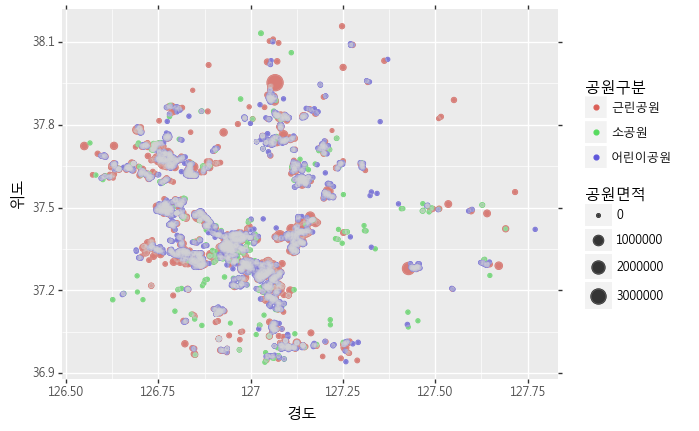

<ggplot: (-9223372036837707832)>

In [76]:
(ggplot(temp)
 + aes(x = '경도', y = '위도', color = '공원구분', size = '공원면적')
 + geom_point()
 + geom_jitter(color = 'lightgray', alpha = 0.25)
 + theme(text = element_text(family = 'Malgun Gothic'))
)

## 전국 시도 공원 시각화

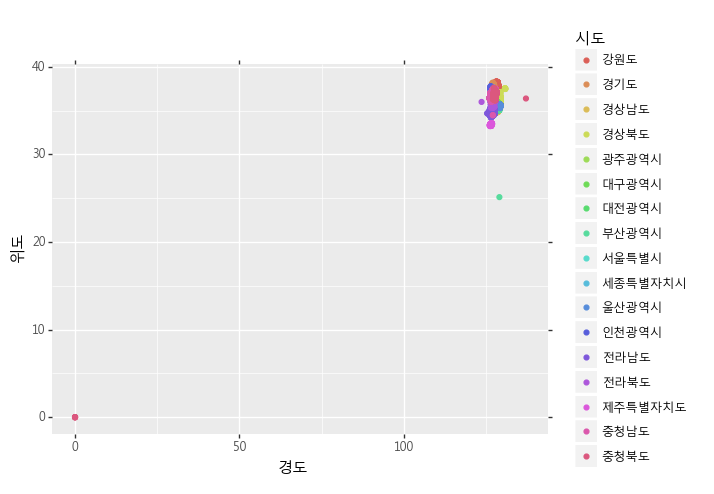

<ggplot: (-9223372036840805579)>

In [77]:
(ggplot(park)
 + aes(x = '경도', y = '위도', color = '시도')
 + geom_point()
 + theme(text = element_text(family = 'Malgun Gothic'))
)

In [79]:
park.loc[(park['위도'] < 26 ) | (park['경도'] >= 132)]


,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
10312,26710-00002,굿거리언덕공원,근린공원,부산광역시 기장군 기장읍 내리 800,부산광역시 기장군 기장읍 내리 800,25.115601,129.122735,12124.30,051-709-4531,2019-02-13,3400000,부산광역시 기장군,부산광역시,기장군
11273,43745-00020,율리문화공원,문화공원,충청북도 증평군 증평읍 율리 337일원,충청북도 증평군 증평읍 율리 337일원,0.000000,0.000000,6.15,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11274,43745-00021,2호수변공원,수변공원,충청북도 증평군 증평읍 율리 514일원,충청북도 증평군 증평읍 율리 514일원,0.000000,0.000000,41.33,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11275,43745-00022,노암 소공원1,소공원,충청북도 증평군 도안면 노암리 산40-5번지 일원,충청북도 증평군 도안면 노암리 산40-5번지 일원,0.000000,0.000000,8.04,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11276,43745-00023,노암 소공원2,소공원,충청북도 증평군 도안면 노암리 782-1번지 일원,충청북도 증평군 도안면 노암리 782-1번지 일원,0.000000,0.000000,1.49,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11277,43745-00024,노암근린공원,근린공원,충청북도 증평군 도안면 노암리 746-2번지 일원,충청북도 증평군 도안면 노암리 746-2번지 일원,0.000000,0.000000,13.15,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11279,43745-00026,자전거공원,문화공원,충청북도 증평군 증평읍 남하리 1017-36일원,충청북도 증평군 증평읍 남하리 1017-36일원,0.000000,0.000000,9.81,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
11280,43745-00027,항일역사공원,역사공원,충청북도 증평군 도안면 석곡리 569일원,충청북도 증평군 도안면 석곡리 569일원,0.000000,0.000000,30.30,NaN,2019-05-31,5570000,충청북도 증평군,충청북도,증평군
13546,43113-00080,근린공원5(만수공원),근린공원,충청북도 청주시 흥덕구 오송읍 만수리 512,충청북도 청주시 흥덕구 오송읍 만수리 512,36.374204,137.202661,33258.00,043-201-4433,2019-06-21,5710000,충청북도 청주시,충청북도,청주시


In [82]:
park_loc_notnull = park.loc[(park['위도'] > 26 ) & (park['경도'] < 132) & park['시도'].notnull()]

park_loc_notnull.shape

(17958, 14)

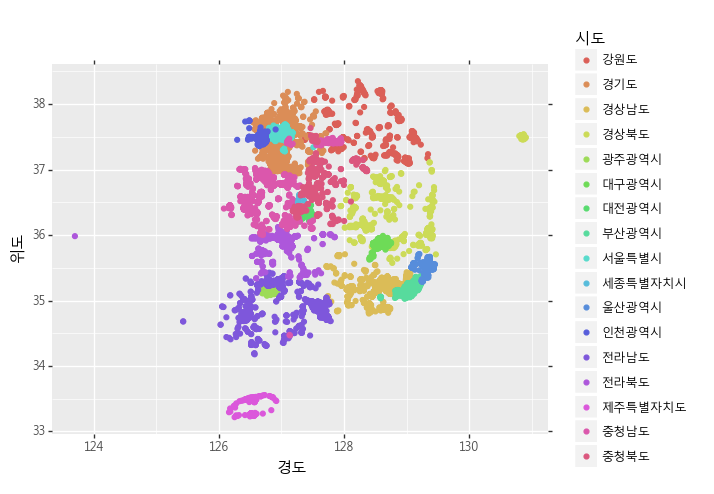

<ggplot: (-9223372036835739560)>

In [83]:
(ggplot(park_loc_notnull)
 + aes(x = '경도', y = '위도', color = '시도')
 + geom_point()
 + theme(text = element_text(family = 'Malgun Gothic'))
)

## 지도시각화

In [84]:
gg_suwon = gg.loc[gg['구군'] == '수원시']
gg_suwon.shape

(261, 14)

In [88]:
mapping = folium.Map(location = [gg_suwon['위도'].mean(), gg_suwon['경도'].mean()], zoom_start = 13)

for n in range(0,len(gg_suwon)):
    folium.Marker([gg_suwon.iloc[n,5], gg_suwon.iloc[n,6]], tooltip = gg_suwon.iloc[n, 1]).add_to(mapping)
    
mapping

## circlemarker folium 시각화

In [89]:
gg_suwon['공원면적비율'] = gg_suwon['공원면적'].apply(lambda x : np.sqrt(x)*0.01)
gg_suwon['공원면적비율'].head()

16660    0.300000
16661    0.547905
16662    0.131909
16663    0.332385
16664    0.320983
Name: 공원면적비율, dtype: float64

In [90]:
map = folium.Map(location = [gg_suwon['위도'].mean(), gg_suwon['경도'].mean()], zoom_start = 12)

for n in gg_suwon.index:
    park_name = gg_suwon.loc[n, '공원명'] + '-' + gg_suwon.loc[n, '소재지도로명주소']
    icon_color = 'blue'
    folium.CircleMarker(
        location = [gg_suwon.loc[n,'위도'], gg_suwon.loc[n, '경도']],
        radius = gg_suwon['공원면적비율'][n],
        popup = park_name,
        color = icon_color,
        fill = True,
        fill_color = icon_color
    ).add_to(map)
    
map

## 일부 공원만 보기

In [96]:
park_type = r'.*((역사|체육|수변|문화|묘지)공원).*'
gg_sample = gg.loc[gg['공원구분'].str.match(park_type)]

gg_sample.shape

(258, 14)

In [93]:
gg.dtypes

관리번호         object
공원명          object
공원구분         object
소재지도로명주소     object
소재지지번주소      object
위도          float64
경도          float64
공원면적        float64
전화번호         object
데이터기준일자      object
제공기관코드       object
제공기관명        object
시도           object
구군           object
dtype: object

In [99]:
geo_df = gg_sample

map = folium.Map(location = [geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start = 9)

for n in geo_df.index:
    park_name = geo_df.loc[n, '공원명'] + '-' + geo_df.loc[n, '소재지도로명주소']
    folium.Marker([geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],popup = park_name).add_to(map)
    
map

## 서울특별시 시각화

In [101]:
seoul = park.loc[park['시도'] == '서울특별시']
seoul.shape

(1629, 14)

In [102]:
seoul_park =  seoul['공원구분'].value_counts().reset_index()
seoul_park

,index,공원구분
0,어린이공원,1041
1,근린공원,337
2,소공원,166
3,기타,51
4,문화공원,12
5,역사공원,12
6,수변공원,4
7,도시농업공원,3
8,체육공원,3


In [104]:
seoul_park.columns = ('공원구분','합계')
seoul_park

,공원구분,합계
0,어린이공원,1041
1,근린공원,337
2,소공원,166
3,기타,51
4,문화공원,12
5,역사공원,12
6,수변공원,4
7,도시농업공원,3
8,체육공원,3


In [105]:
seoul['구군'].unique()

array(['종로구', '도봉구', '서대문구', '송파구', '중랑구', '노원구', '성동구', '서초구', '관악구',
       '광진구', '용산구', '동대문구', '강남구', '양천구', '성북구', '강동구', '중구', '강서구',
       '금천구', '은평구', '영등포구', '강북구', '구로구', '동작구'], dtype=object)

In [106]:
seoul_gu = seoul['구군'].value_counts().reset_index()
seoul_gu_count = seoul_gu.shape[0]
seoul_gu.head()

,index,구군
0,송파구,158
1,강서구,139
2,강남구,134
3,노원구,118
4,서초구,114


In [107]:
seoul_gu.columns=['구군','합계']
seoul_gu = seoul_gu.sort_values(by = '합계',ascending=False)
seoul_gu.head()

,구군,합계
0,송파구,158
1,강서구,139
2,강남구,134
3,노원구,118
4,서초구,114


In [108]:
geo_df = seoul.loc[seoul['구군'].str.match( r'.*(강남구|송파구|서초구).*')]
geo_df.head()

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,전화번호,데이터기준일자,제공기관코드,제공기관명,시도,구군
2122,11710-00001,가락,근린공원,서울특별시 송파구 양재대로64길 42,서울특별시 송파구 가락동 37,37.498011,127.124444,27648.2,02-2147-3380,2019-03-01,3230000,서울특별시 송파구,서울특별시,송파구
2123,11710-00002,개나리,근린공원,서울특별시 송파구 잠실동 44-6,서울특별시 송파구 잠실동 44-6,37.507553,127.094089,6669.1,02-2147-3380,2019-03-01,3230000,서울특별시 송파구,서울특별시,송파구
2124,11710-00003,개롱,근린공원,서울특별시 송파구 동남로 178,서울특별시 송파구 가락동 195,37.493713,127.130745,21544.4,02-2147-3380,2019-03-01,3230000,서울특별시 송파구,서울특별시,송파구
2125,11710-00004,거여,근린공원,서울특별시 송파구 오금로51길 20,서울특별시 송파구 거여동 11,37.496821,127.141344,16185.1,02-2147-3380,2019-03-01,3230000,서울특별시 송파구,서울특별시,송파구
2126,11710-00005,건너말,근린공원,서울특별시 송파구 중대로10길 29,서울특별시 송파구 가락동 110,37.491790,127.123924,11327.8,02-2147-3380,2019-03-01,3230000,서울특별시 송파구,서울특별시,송파구


In [109]:
map = folium.Map(location = [geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start = 10)

for n in geo_df.index:
    park_name =geo_df.loc[n,'공원명'] + '-' + geo_df.loc[n,'소재지도로명주소']
    icon_color ='blue'
    folium.Marker(
        location =[geo_df.loc[n,'위도'], geo_df.loc[n,'경도']],
      
    popup=park_name
  
   
    ).add_to(map)

map

## 제주도

In [113]:
jeju = park.loc[park['시도'] == '제주특별자치도']
jeju.shape

(246, 14)

In [114]:
jeju_park =  jeju['공원구분'].value_counts().reset_index()
jeju_park

,index,공원구분
0,어린이공원,152
1,근린공원,78
2,체육공원,6
3,문화공원,5
4,역사공원,3
5,소공원,1
6,수변공원,1


In [118]:
mapp = folium.Map(location = [jeju['위도'].mean(), jeju['경도'].mean()], zoom_start = 9)

for n in range(0,len(jeju)):
    folium.Marker([jeju.iloc[n,5], jeju.iloc[n,6]], tooltip = jeju.iloc[n, 1]).add_to(mapp)
    
mapp